## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [1]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [2]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  991 non-null    int32
 1   Package    991 non-null    int32
 2   Variety    991 non-null    int32
 3   Origin     991 non-null    int32
 4   Item Size  991 non-null    int32
 5   Color      991 non-null    int32
dtypes: int32(6)
memory usage: 31.0 KB


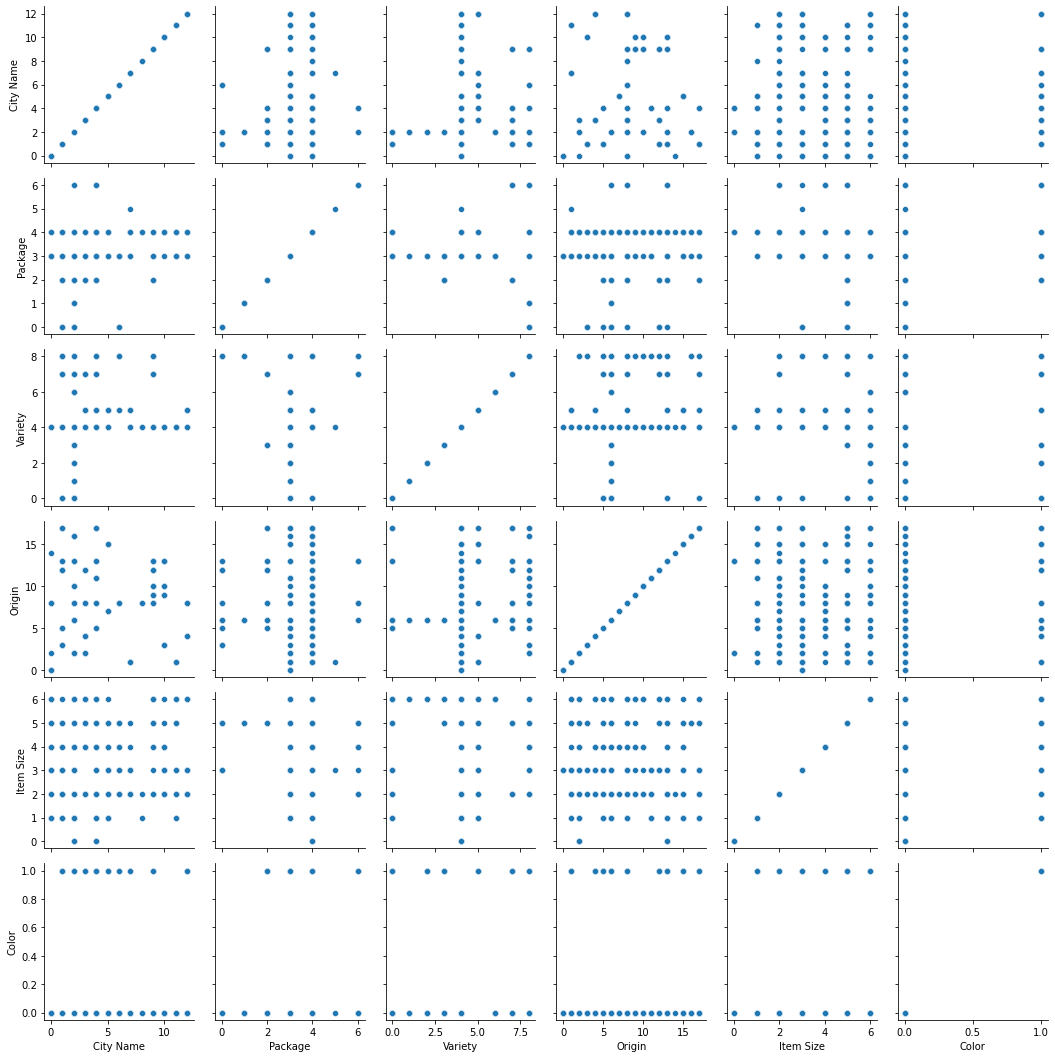

In [7]:
import seaborn as sns
g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

c:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Color', ylabel='Variety'>

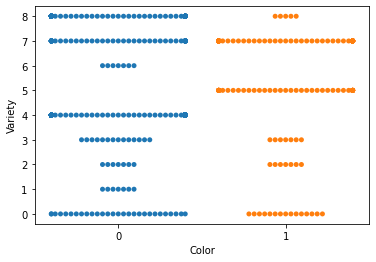

In [11]:
sns.swarmplot(x="Color", y="Variety", data=new_pumpkins)

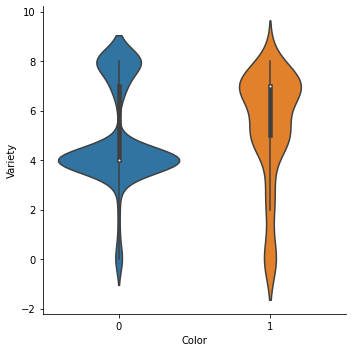

In [12]:
sns.catplot(x="Color", y="Variety", kind="violin", data=new_pumpkins)

In [3]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
import pickle 


model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

model_name = 'pumpkin_model.pkl'
pickle.dump(model, open(model_name, 'wb'))



print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

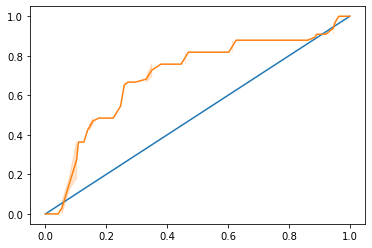

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

In [19]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748


In [32]:
# Task load candy data and predict if there is chocolate in the candy based on the other variables
df = pd.read_csv("candy-data.csv", delimiter=",")
df.info()
# Todo: Encode the competitorname with the label-encoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [33]:
# Encoding:

df['competitorname'] = LabelEncoder().fit_transform(df.competitorname.values)

In [36]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [41]:
Selected_features = ['competitorname', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent']

X = df[Selected_features]
y = df['chocolate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

confusion_matrix(y_test, predictions)



              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.88      0.91        17
weighted avg       0.95      0.94      0.94        17

Predicted labels:  [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1]
Accuracy:  0.9411764705882353


c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[13,  0],
       [ 1,  3]], dtype=int64)

In [50]:
# Assignment: use full pumpkin data set:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [55]:
pumpkins = pumpkins.apply(LabelEncoder().fit_transform)
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   City Name        1757 non-null   int32
 1   Type             1757 non-null   int32
 2   Package          1757 non-null   int32
 3   Variety          1757 non-null   int32
 4   Sub Variety      1757 non-null   int32
 5   Grade            1757 non-null   int64
 6   Date             1757 non-null   int32
 7   Low Price        1757 non-null   int64
 8   High Price       1757 non-null   int64
 9   Mostly Low       1757 non-null   int64
 10  Mostly High      1757 non-null   int64
 11  Origin           1757 non-null   int32
 12  Origin District  1757 non-null   int32
 13  Item Size        1757 non-null   int32
 14  Color            1757 non-null   int32
 15  Environment      1757 non-null   int64
 16  Unit of Sale     1757 non-null   int32
 17  Quality          1757 non-null   int64
 18  Conditio

In [57]:
pumpkins.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [63]:
cols = ['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode' ]

# drop unnecessary columns:
pumpkins = pumpkins.drop( [c for c in pumpkins.columns if c not in cols], axis=1)
pumpkins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   City Name        1757 non-null   int32
 1   Type             1757 non-null   int32
 2   Package          1757 non-null   int32
 3   Variety          1757 non-null   int32
 4   Sub Variety      1757 non-null   int32
 5   Grade            1757 non-null   int64
 6   Date             1757 non-null   int32
 7   Low Price        1757 non-null   int64
 8   High Price       1757 non-null   int64
 9   Mostly Low       1757 non-null   int64
 10  Mostly High      1757 non-null   int64
 11  Origin           1757 non-null   int32
 12  Origin District  1757 non-null   int32
 13  Item Size        1757 non-null   int32
 14  Color            1757 non-null   int32
 15  Environment      1757 non-null   int64
 16  Unit of Sale     1757 non-null   int32
 17  Quality          1757 non-null   int64
 18  Conditio

In [66]:
features = ['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Quality', 'Environment',
       'Unit of Sale', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode' ]

X = pumpkins[features]
y = pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       194
           1       0.00      0.00      0.00         2
           2       0.42      0.17      0.24        30
           3       0.59      0.43      0.50       126

    accuracy                           0.63       352
   macro avg       0.41      0.36      0.37       352
weighted avg       0.61      0.63      0.60       352

Predicted labels:  [0 3 0 0 0 0 3 3 0 3 2 0 3 2 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 3 3 0 0 0 0 0 0
 3 0 3 0 3 0 0 3 0 0 0 2 0 0 0 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3
 0 0 3 0 0 3 3 0 0 0 0 3 3 3 2 0 0 3 3 0 0 3 3 0 2 0 0 0 3 0 3 0 0 0 0 3 0
 0 0 3 0 0 0 0 0 0 0 0 3 3 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 0 0 0 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 3 0
 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 3 3 0 3 3 0 3 3 0 3 2 3 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 2 0 3 3 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 3 2 3 3 0 2
 0 0 0 0 0 0 0 3 0 0 

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

array([[162,   0,   5,  27],
       [  0,   0,   1,   1],
       [ 15,   0,   5,  10],
       [ 71,   0,   1,  54]], dtype=int64)